# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.
* __Пожалуйста, делайте код читаемым и не оставляйте огромный бессмысленный поток данных в stdout в ноутбуке. Плохо оформленный ноутбук расстраивает преподавателей, проверяющих ваши задания.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [42]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,555,87,49,86,190,64,9,177,37,21,153,197,471,209,67,11,7,192,199
1,446,101,52,101,197,62,9,188,35,22,162,208,527,203,67,14,15,193,202
2,537,86,40,66,139,59,7,122,54,17,139,145,225,143,63,7,11,202,208
3,610,103,56,105,183,59,10,210,32,24,173,217,648,218,72,13,22,188,196
4,171,106,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183
5,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
6,646,90,38,79,185,69,6,160,40,20,130,178,393,133,66,2,14,198,205
7,690,94,40,85,186,62,9,169,39,20,139,184,430,133,61,2,9,200,210
8,682,90,46,73,137,58,11,161,43,20,158,170,373,186,76,0,9,182,193
9,194,92,37,86,167,60,7,158,42,20,131,181,373,144,68,9,21,190,196


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [43]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.102004,93.821494,44.941712,82.435337,169.331512,61.561020,8.530055,169.650273,40.714026,20.644809,148.258652,189.185792,443.987250,174.987250,72.391621,6.163934,12.475410,188.876138,195.635701
std,244.264157,8.228323,6.240341,15.853973,32.879721,6.777917,3.905535,33.215478,7.774901,2.597633,14.776885,30.901452,176.900106,32.355318,7.118497,4.866324,8.926394,6.172635,7.423225
min,0.000000,73.000000,33.000000,40.000000,109.000000,47.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,211.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,150.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,422.000000,93.000000,44.000000,81.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,636.000000,100.000000,49.000000,98.000000,197.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,252.000000,126.000000,52.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,203.000000,211.000000


In [44]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.8 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt

In [46]:
n_classes = 4

Меняем y_train, y_test, подставляя вместо стороковых типов автомобилей их целочисленные коды (нужно для roc_curve), да и дальше сделает вычисления удобнее.

In [47]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

In [48]:
#y_train

In [49]:
encoder.classes_

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [50]:
# чтобы графики выглядели удобнее:

import seaborn as sns
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.5,
 color_codes=False, rc=None) 

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`) (для каждого класса), оцените точность классификации и f1-score. 

*Hint: ROC-кривая в случае мультиклассовой классификации может быть построена либо для каждого класса, либо по усредненным значениям TPR и FPR. Для примера можно обратиться к sklearn: [ссылка](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). В данном задании подойдет любой из вариантов, основная цель - осознать, что для multiclass тоже можно построить данную кривую.*

In [51]:
lr_clf = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000)
pipe = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("lr", lr_clf)])

c_param = np.linspace(0.01, 1, 10)
paramers = {'lr__C':c_param, 'lr__penalty':['l1', 'l2']}

clf_grid = GridSearchCV(pipe, param_grid=paramers, cv = 5, scoring = 'accuracy', n_jobs = -1)

y_score = clf_grid.fit(X_train, y_train)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [52]:
#y_score

In [53]:
y_res = clf_grid.predict(X_test)

In [54]:
best_score = clf_grid.best_score_
print('best score : ', best_score)

best score :  0.6994535519125683


Рассмотрим оптимальные параметры:

In [55]:
best_params = clf_grid.best_params_
print(best_params)

{'lr__C': 0.89, 'lr__penalty': 'l1'}


ROC-кривая (для каждого класса):

In [56]:
best_lr_clf = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000, penalty = 'l1', C = 0.89)
best_lr_clf.fit(X_train, y_train)
y_pred = best_lr_clf.predict(X_test)

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

Приведем два последних вычисленных значения в удобное состояние (4 столбца, соответствуют четырем классам, единичка стоит в том, к какому классу относится объект):

In [57]:
yy_test = np.zeros((y_test.shape[0], 4))
for i in range(y_test.shape[0]):
    yy_test[i][y_test[i]] = 1

In [58]:
yy_pred = np.zeros((y_pred.shape[0], 4))
for i in range(y_pred.shape[0]):
    yy_pred[i][y_pred[i]] = 1

То есть выглядит так:

In [59]:
yy_test

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

Для каждого класса вычисляем roc_curve:

In [60]:
#уже вводилось раньше, но на всякий случай еще раз
n_classes = 4

In [61]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(yy_test[:, i], yy_pred[:, i])

Построение графиков:

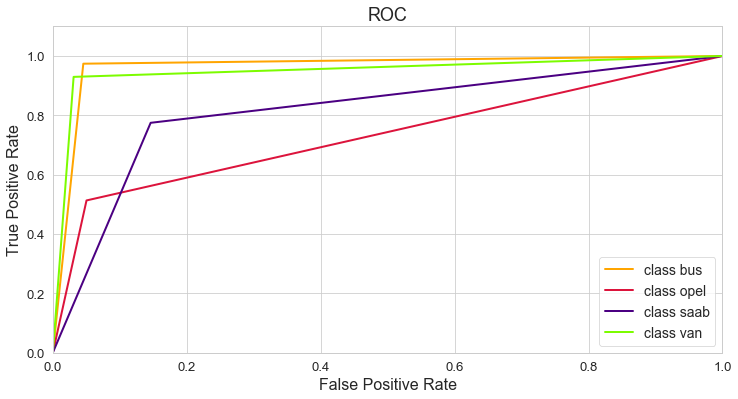

In [62]:
colors = ['orange', 'crimson', 'indigo', 'lawngreen']

plt.figure(figsize=(12, 6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='class {0}'
             ''.format(encoder.classes_[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

Оценим точность классификации:

In [63]:
print( "accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.7946127946127947


Оценим f1-score:

In [64]:
print("f1_score: ", f1_score(y_test, y_pred, average = 'macro'))

f1_score:  0.7886428826808379


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [66]:
from sklearn.decomposition import PCA

Применяем:

In [67]:
pca = PCA()
pca.fit(X_train, y_train)
evr = np.cumsum(pca.explained_variance_ratio_)

Строим график:

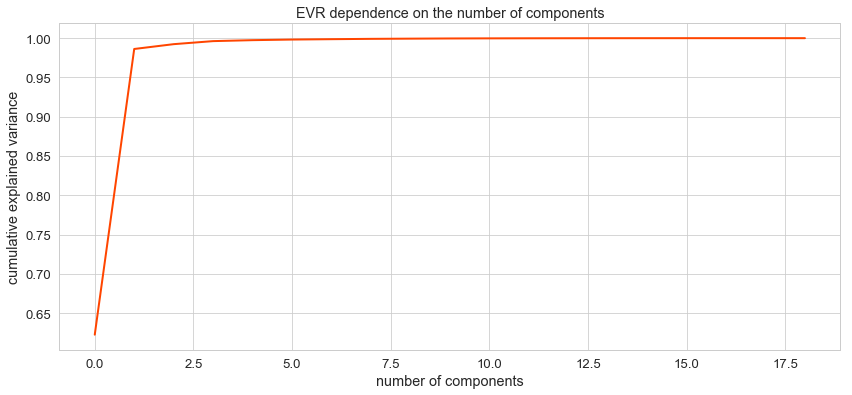

In [68]:
plt.figure(figsize=(14, 6))
plt.plot(evr, color = 'orangered', lw = 2)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("EVR dependence on the number of components")
plt.show()

Как мы видим, в районе 3-4 компонент график сильно уходит вверх, так что в следующем пункте логично будет взять число компонент, равное, например, четырем или трем (мы уже практически достигаем единицы при трех компонентам, получается значение около 0.99). 

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

Исходя из графика в предыдущем пункте, выбираем 4 компоненты (график уже довольно сильно ушел вверх, к единице и достиг хорошего значения). В принципе можно, наверное, взять даже и 3 компоненты, но все же на графике между 3 и 4 компонентами еще можно увидеть разницу, в то время как при 4 и 5 компонентах значения уже практически одинаковые.

Преобразовываем train и test выборки:

In [69]:
n_comps = 4

best_pca = PCA(n_components = n_comps)
best_pca.fit(X_train, y_train)

XX_train = best_pca.transform(X_train)
XX_test = best_pca.transform(X_test)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

Подбираем оптимальные параметры:

In [74]:
lr_clf_pca = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000)
pipe_pca = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("lr", lr_clf_pca)])

c_param = np.linspace(0.01, 1, 10)
paramers = {'lr__C':c_param, 'lr__penalty':['l1', 'l2']}

clf_grid_pca = GridSearchCV(pipe_pca, param_grid=paramers, cv = 5, scoring = 'accuracy', n_jobs = -1)

y_score_pca = clf_grid_pca.fit(XX_train, y_train)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [75]:
#y_score_pca

In [76]:
best_score = clf_grid_pca.best_score_
print('best score : ', best_score)

best score :  0.41530054644808745


In [77]:
best_params = clf_grid_pca.best_params_
print(best_params)

{'lr__C': 1.0, 'lr__penalty': 'l1'}


Классификатор с оптимальными параметрами:

In [78]:
best_lr_clf_pca = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000, penalty = 'l1', C = 1)
best_lr_clf_pca.fit(XX_train, y_train)
y_pred = best_lr_clf_pca.predict(XX_test)

y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

Как и в пункте до этого, преобразовываем значения:

In [79]:
yy_test = np.zeros((y_test.shape[0], 4))

for i in range(y_test.shape[0]):
    yy_test[i][y_test[i]] = 1
     
yy_pred = np.zeros((y_pred.shape[0], 4))

for i in range(y_pred.shape[0]):
    yy_pred[i][y_pred[i]] = 1

Переходим к построению графика roc-кривой:

In [80]:
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(yy_test[:, i], yy_pred[:, i])

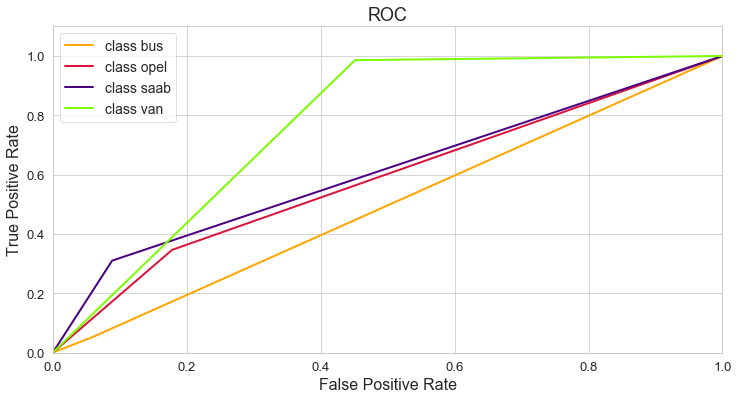

In [81]:
colors = ['orange', 'crimson', 'indigo', 'lawngreen']

plt.figure(figsize=(12, 6))

for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='class {0}'.format(encoder.classes_[i]))
    
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('ROC', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

Оценим точность классификации:

In [82]:
print( "accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.41414141414141414


Оценим f1-score:

In [83]:
print("f1_score: ", f1_score(y_test, y_pred, average = 'macro'))

f1_score:  0.3564046502987433


Как можно заметить, результаты получились намного хуже, чем в том пункте, где не было PCA. Видимо, число компонент было выбрано все же довольно маленькое. На самом деле если брать 9 или 10 компонент, то результат уже будет в районе 0.63 для accuracy и f1_score.

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
regr_tree = DecisionTreeClassifier()
pipe_tree = Pipeline(memory = None, steps = [("scaler", MinMaxScaler()), ("tree", regr_tree)])

depth_param = np.linspace(1, 50, 50)
paramers = {'tree__max_depth':depth_param}

regr_tree_grid = GridSearchCV(pipe_tree, param_grid = paramers, cv = 5, scoring = 'r2', n_jobs = -1)

In [137]:
y_score_tree = regr_tree_grid.fit(X_train, y_train)

C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Elena\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [138]:
#sorted(metrics.SCORERS.keys())

In [139]:
#y_score_tree

In [140]:
best_score = regr_tree_grid.best_score_
print('best score : ', best_score)

best_params = regr_tree_grid.best_params_
print(best_params)

best score :  0.5704295993111121
{'tree__max_depth': 13.0}


Итак, используем в нашей модели max_depth = 13

In [141]:
best_regr_tree = DecisionTreeClassifier(max_depth = 13)

Обучаем модель:

In [142]:
best_regr_tree.fit(X_train, y_train)

best_regr_tree_2 = DecisionTreeClassifier(max_depth = 13)
best_regr_tree_2.fit(XX_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Предсказываем результат:

In [143]:
y_pred_1 = best_regr_tree.predict(X_test)
y_pred_2 = best_regr_tree_2.predict(XX_test)

y_test = y_test.astype(int)
y_pred_1 = y_pred_1.astype(int)
y_pred_2 = y_pred_2.astype(int)

In [144]:
print( "accuracy for initial set: ", accuracy_score(y_test, y_pred_1))
print( "accuracy for transformed set: ", accuracy_score(y_test, y_pred_2))

accuracy for initial set:  0.6632996632996633
accuracy for transformed set:  0.4276094276094276


In [145]:
print( "f1 score for initial set: ", f1_score(y_test, y_pred_1, average = 'macro'))
print( "f1 score for transformed set: ", f1_score(y_test, y_pred_2, average = 'macro'))

f1 score for initial set:  0.6647246210452787
f1 score for transformed set:  0.42731802914856754


Как можно заметить, во втором случае оба результата получились хуже, чем в первом. К слову, первый результат получился тоже не слишком высокий, хотя и заметно лучше второго.

Вообще тут GridSearch выдал глубину 13, при использовании глубины 17-18 получалось поднять accuracy примерно до 0.72, но выше все равно она не поднималась.

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [155]:
from sklearn.ensemble import BaggingRegressor, BaggingClassifier

In [162]:
best_lr = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000, penalty = 'l1', C = 0.89)

In [163]:
best_tree = DecisionTreeClassifier(max_depth = 13)

In [164]:
bagging_lr = BaggingClassifier(base_estimator = best_lr, n_estimators = 50, n_jobs=-1)
bagging_lr.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=0.89, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8000, multi_class='multinomial',
          n_jobs=None, penalty='l1', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [165]:
bagging_tree = BaggingClassifier(DecisionTreeClassifier(max_depth = 13), n_estimators = 50, n_jobs=-1)
bagging_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

Вычисления, необходимые для построения графиков:

In [166]:
accuracies_lr_test = np.zeros(49)
accuracies_tree_test = np.zeros(49)
f1s_lr_test = np.zeros(49)
f1s_tree_test = np.zeros(49)

accuracies_lr_train = np.zeros(49)
accuracies_tree_train = np.zeros(49)
f1s_lr_train = np.zeros(49)
f1s_tree_train = np.zeros(49)

for num_alg in range (2, 51):
    bagging_lr.set_params(n_estimators = num_alg)
    bagging_tree.set_params(n_estimators = num_alg)

    y_pred_lr = bagging_lr.predict(X_test)
    y_pred_tree = bagging_tree.predict(X_test)
    accuracies_lr_test[num_alg-2] = accuracy_score(y_test, y_pred_lr)
    accuracies_tree_test[num_alg-2] = accuracy_score(y_test, y_pred_tree)
    f1s_lr_test[num_alg-2] = f1_score(y_test, y_pred_lr, average = 'macro')
    f1s_tree_test[num_alg-2] = f1_score(y_test, y_pred_tree, average = 'macro')

    y_tr_pred_lr = bagging_lr.predict(X_train)
    y_tr_pred_tree = bagging_tree.predict(X_train)
    accuracies_lr_train[num_alg-2] = accuracy_score(y_train, y_tr_pred_lr)
    accuracies_tree_train[num_alg-2] = accuracy_score(y_train, y_tr_pred_tree)
    f1s_lr_train[num_alg-2] = f1_score(y_train, y_tr_pred_lr, average = 'macro')
    f1s_tree_train[num_alg-2] = f1_score(y_train, y_tr_pred_tree, average = 'macro')

Строим графики:

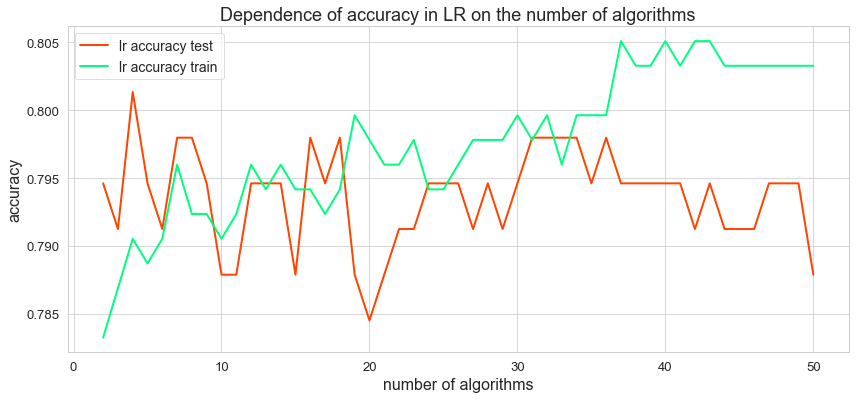

In [167]:
plt.figure(figsize=(14, 6))
num_alg = np.linspace(2, 50, 49)

plt.plot(num_alg, accuracies_lr_test, color='orangered', lw=2, label='lr accuracy test')
plt.plot(num_alg, accuracies_lr_train, color='springgreen', lw=2, label='lr accuracy train')

plt.xlabel('number of algorithms', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.title('Dependence of accuracy in LR on the number of algorithms', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

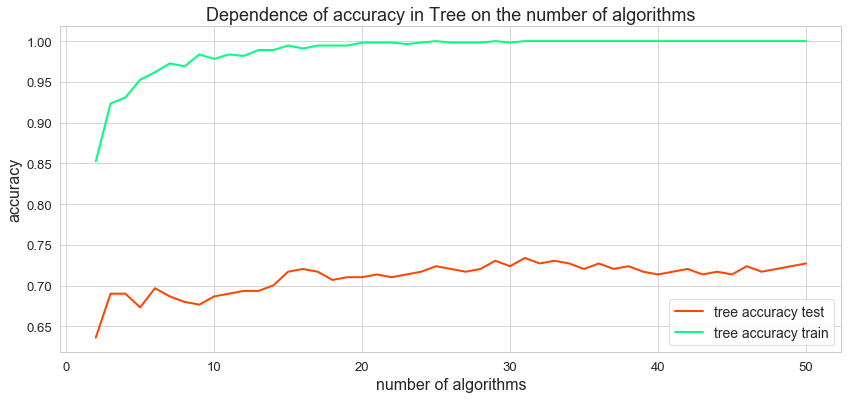

In [168]:
plt.figure(figsize=(14, 6))
num_alg = np.linspace(2, 50, 49)

plt.plot(num_alg, accuracies_tree_test, color='orangered', lw=2, label='tree accuracy test')
plt.plot(num_alg, accuracies_tree_train, color='springgreen', lw=2, label='tree accuracy train')

plt.xlabel('number of algorithms', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.title('Dependence of accuracy in Tree on the number of algorithms', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

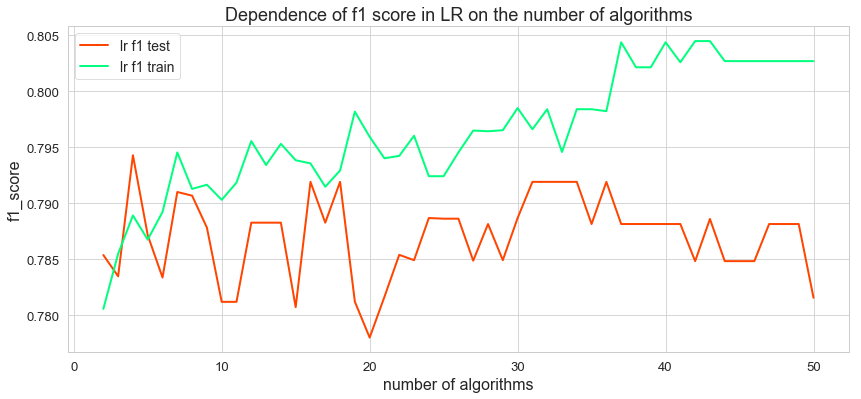

In [169]:
plt.figure(figsize=(14, 6))
num_alg = np.linspace(2, 50, 49)

plt.plot(num_alg, f1s_lr_test, color='orangered', lw=2, label='lr f1 test')
plt.plot(num_alg, f1s_lr_train, color='springgreen', lw=2, label='lr f1 train')

plt.xlabel('number of algorithms', fontsize = 16)
plt.ylabel('f1_score', fontsize = 16)
plt.title('Dependence of f1 score in LR on the number of algorithms', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

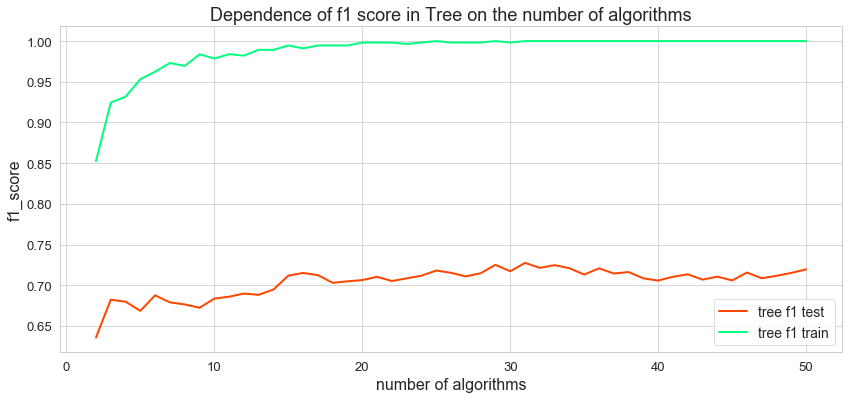

In [170]:
plt.figure(figsize=(14, 6))
num_alg = np.linspace(2, 50, 49)

plt.plot(num_alg, f1s_tree_test, color='orangered', lw=2, label='tree f1 test')
plt.plot(num_alg, f1s_tree_train, color='springgreen', lw=2, label='tree f1 train')

plt.xlabel('number of algorithms', fontsize = 16)
plt.ylabel('f1_score', fontsize = 16)
plt.title('Dependence of f1 score in Tree on the number of algorithms', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

**Анализ графиков**

Как можно заметить, для логистической регрессии как accuracy, так и f1_score на тестовой выборке возрастают в районе 4-5 моделей. Для train это значение чуть больше 7. В данном случае, наверное, логично было бы использовать около 5 моделей. 

Для решающего дерева как accuracy, так и f1_score увеличиваются при увеличении числа моделей. Однако на тестовой выборке можно заметить скачок в районе 15-16 моделей, на котором результат тоже довольно хорош. При 50 это значение, конечно, лучше, однако большое число моделей может добавить ненужную сложность. Поэтому, скорее всего, стоит рассматривать в районе 15 моделей.

Вообще чисто визуально в случае решающего дерева графики ведут себя более постоянно, происходит меньше скачков, но на самом деле это происходит просто из-за масштаба. В случае логистической регрессии, на первый взгляд, графики ведут себя более непредсказуемо, но там промежуток значений намного меньше, поэтому в реальности эти скачки довольно незначительные.

На самом деле полученные значения очень близки к тем оптимальным параметрам, что были подобраны в предыдущих пунктах, поэтому я полагаю, что они являются оптимальными и в этом случае. В принципе это довольно логично, так как эти значения являются оптимальными для различных алгоритмов, а значит и для их общего результата.

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
forest_mod = RandomForestClassifier(n_estimators = 50, n_jobs=-1)
forest_mod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Вычисляем значения, необходимые для построения графиков:

In [176]:
accuracies_test = np.zeros(49)
f1s_test = np.zeros(49)

accuracies_train = np.zeros(49)
f1s_train = np.zeros(49)

for num_alg in range (2, 51):
    forest_mod = RandomForestClassifier(n_estimators = num_alg, n_jobs=-1)
    forest_mod.fit(X_train, y_train)

    y_pred_forest = forest_mod.predict(X_test)
    accuracies_test[num_alg-2] = accuracy_score(y_test, y_pred_forest)
    f1s_test[num_alg-2] = f1_score(y_test, y_pred_forest, average = 'macro')

    y_tr_pred_forest = forest_mod.predict(X_train)
    accuracies_train[num_alg-2] = accuracy_score(y_train, y_tr_pred_forest)
    f1s_train[num_alg-2] = f1_score(y_train, y_tr_pred_forest, average = 'macro')

Строим графики:

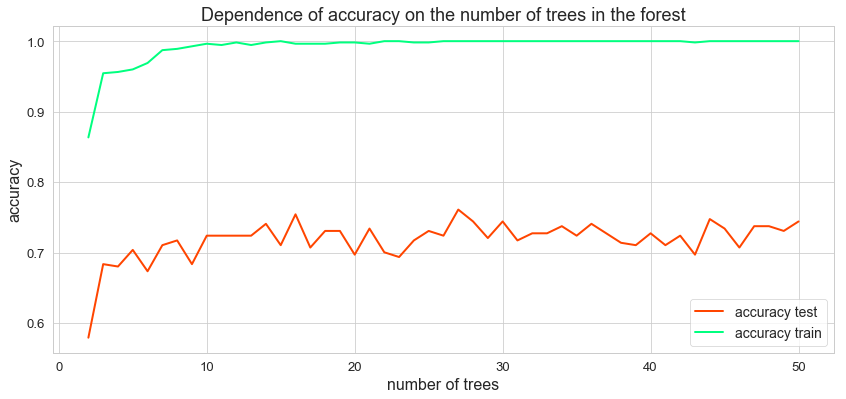

In [177]:
plt.figure(figsize=(14, 6))
num_trees = np.linspace(2, 50, 49)

plt.plot(num_trees, accuracies_test, color='orangered', lw=2, label='accuracy test')
plt.plot(num_trees, accuracies_train, color='springgreen', lw=2, label='accuracy train')

plt.xlabel('number of trees', fontsize = 16)
plt.ylabel('accuracy', fontsize = 16)
plt.title('Dependence of accuracy on the number of trees in the forest', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

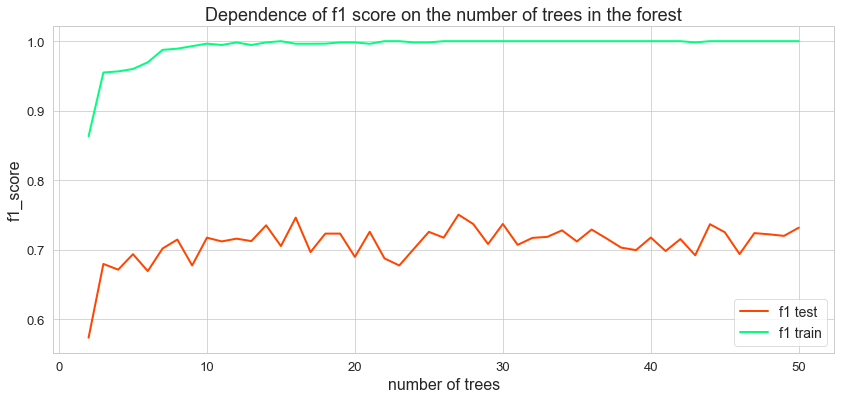

In [178]:
plt.figure(figsize=(14, 6))
num_trees = np.linspace(2, 50, 49)

plt.plot(num_trees, f1s_test, color='orangered', lw=2, label='f1 test')
plt.plot(num_trees, f1s_train, color='springgreen', lw=2, label='f1 train')

plt.xlabel('number of trees', fontsize = 16)
plt.ylabel('f1_score', fontsize = 16)
plt.title('Dependence of f1 score on the number of trees in the forest', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

**Анализ графиков**

Как в случае accuracy, так и в случае f1_score можно заметить, что по сравнению с числом моделей результат не сильно увеличивается при увеличении деревьев на тестовой выборке (на train это улучшение остается прежним). На train при увеличении количества деревьев в лесу, результат все больше улучшается.

Если же посмотреть на test, то можно заметить, что пики были примерно при 15-16, 26-27 и 43-44 деревьях. Из них я бы выбрала первый вариант (15-16 деревьев), поскольку большое количество деревьев может принести ненужные осложнения, а результат при этом не сильно улучшится.

Итак, я полагаю, что оптимальное число деревьев равно 15.

В предыдущем пункте получилось оптимальное число моделей(деревьев) 15-16, которое в некоторой степени близко к полученному только что результату. Число линейных моделей в предыдущем пункте было все же несколько меньше (5-6), чем здесь.

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [179]:
part_size = X_train.shape[0]/10
part_size = int(part_size)+1

sample_size = np.zeros(10)

acc_train = np.zeros((5, 10))
acc_test = np.zeros((5, 10))
f1_o_train = np.zeros((5, 10))
f1_o_test = np.zeros((5, 10))

algos = ['LR', 'TREE', 'LR bagging', 'TREE bagging', 'RandomForest']
metrics = ['accuracy', 'f1 score']

In [184]:
for i in range (10):
    part_size = X_train.shape[0]/10
    part_size = int(part_size)+1
    learn_lr = LogisticRegression(solver = 'saga', multi_class='multinomial', max_iter = 8000, penalty = 'l1', C = 0.89)
    learn_tree = DecisionTreeClassifier(max_depth = 13)
    learn_bagging_lr = BaggingClassifier(base_estimator = learn_lr, n_estimators = 5, n_jobs=-1)
    learn_bagging_tree = BaggingClassifier(base_estimator = learn_tree, n_estimators = 15, n_jobs=-1)
    learn_forest = RandomForestClassifier(n_estimators = 15, n_jobs=-1)
    if (i<=9):
        X_super =  X_train[0: part_size*(i+1), :]
        y_super = y_train[0: part_size*(i+1)]
        sample_size[i] = part_size*(i+1)
    else:
        X_super =  X_train
        y_super = y_train
        sample_size[i] = X_train.shape[0]
    learn_lr.fit(X_super, y_super)
    learn_tree.fit(X_super, y_super)
    learn_bagging_lr.fit(X_super, y_super)
    learn_bagging_tree.fit(X_super, y_super)
    learn_forest.fit(X_super, y_super)
    
    sample_size[i] = part_size*(i+1)
    models = [learn_lr, learn_tree, learn_bagging_lr, learn_bagging_tree, learn_forest]
    
    for j, model in zip(range(5), models):
        y_pr_test = model.predict(X_test)
        y_pr_train = model.predict(X_super)
        
        acc_train[j][i] = accuracy_score(y_super, y_pr_train)
        acc_test[j][i] = accuracy_score(y_test, y_pr_test)
        f1_o_train[j][i] = f1_score(y_super, y_pr_train, average = 'macro')
        f1_o_test[j][i] = f1_score(y_test, y_pr_test, average = 'macro')

    

In [185]:
def accuracy_graph(i):
    plt.figure(figsize=(14, 6))

    plt.plot(sample_size, acc_test[i], color='orangered', lw=2, label='accuracy test')
    plt.plot(sample_size, acc_train[i], color='springgreen', lw=2, label='accuracy train')

    plt.xlabel('sample size', fontsize = 16)
    plt.ylabel('accuracy', fontsize = 16)
    plt.title('{0} : dependency of accuracy on the size of the sample'.format(algos[i]), fontsize = 18)
    plt.legend(fontsize = 14)
    plt.show()

In [186]:
def f1_graph(i):
    plt.figure(figsize=(14, 6))

    plt.plot(sample_size, f1_o_test[i], color='orangered', lw=2, label='f1_score test')
    plt.plot(sample_size, f1_o_train[i], color='springgreen', lw=2, label='f1_score train')

    plt.xlabel('sample size', fontsize = 16)
    plt.ylabel('f1_score', fontsize = 16)
    plt.title('{0} : dependency of f1 score on the size of the sample'.format(algos[i]), fontsize = 18)
    plt.legend(fontsize = 14)
    plt.show()

Логистическая регрессия:

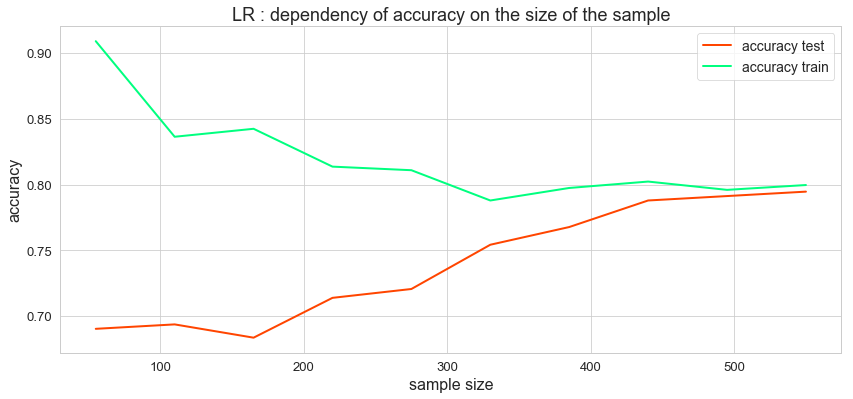

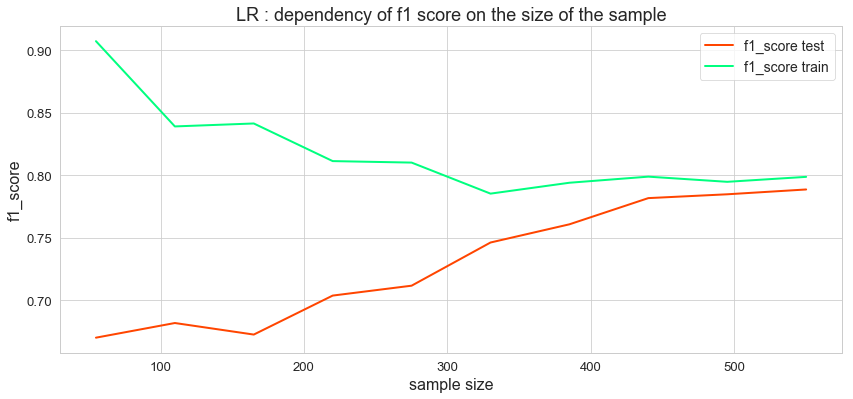

In [187]:
accuracy_graph(0)
f1_graph(0)

Решающее дерево:

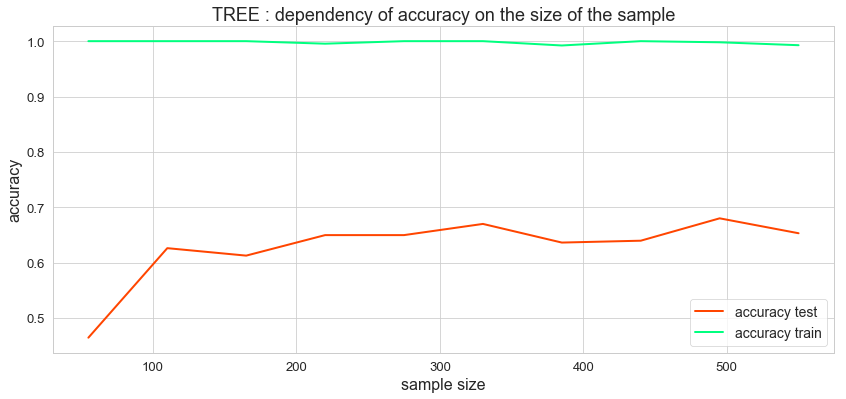

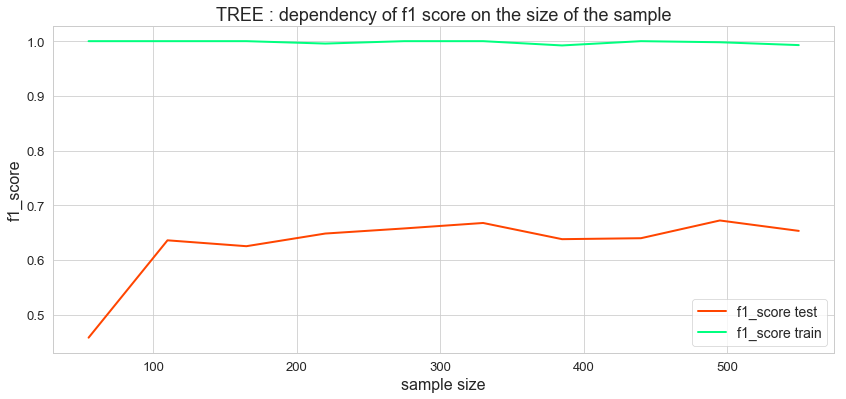

In [188]:
accuracy_graph(1)
f1_graph(1)

Бэггинг над логистическими регрессиями:

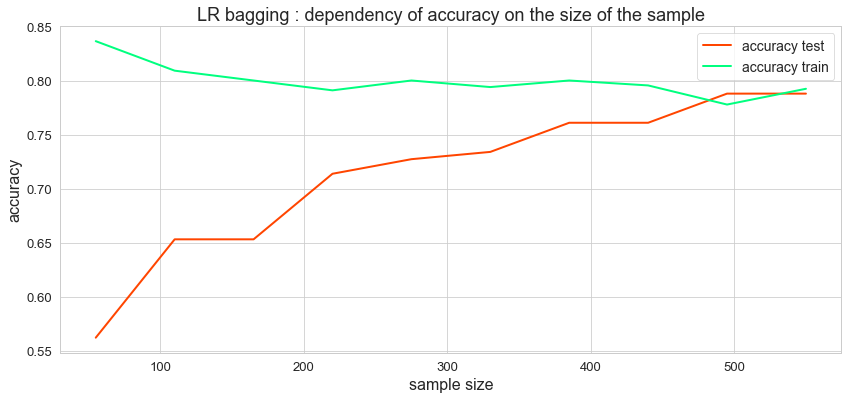

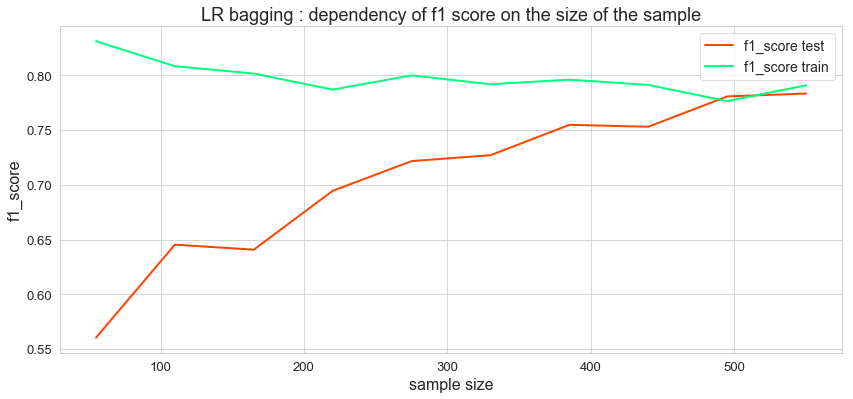

In [189]:
accuracy_graph(2)
f1_graph(2)

Бэггинг над решающими деревьями:

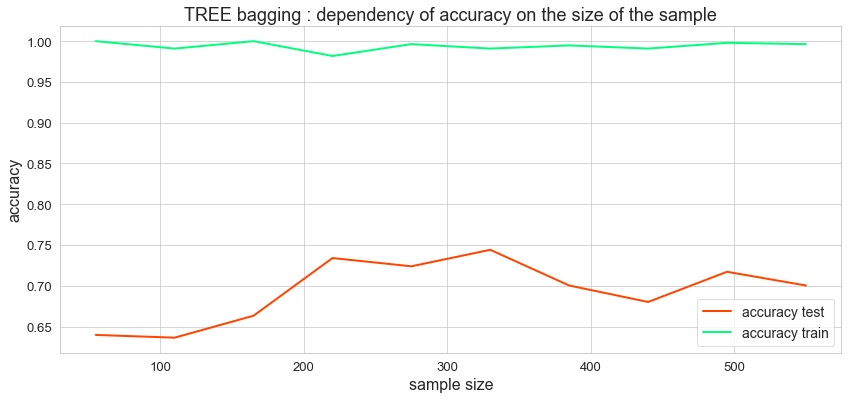

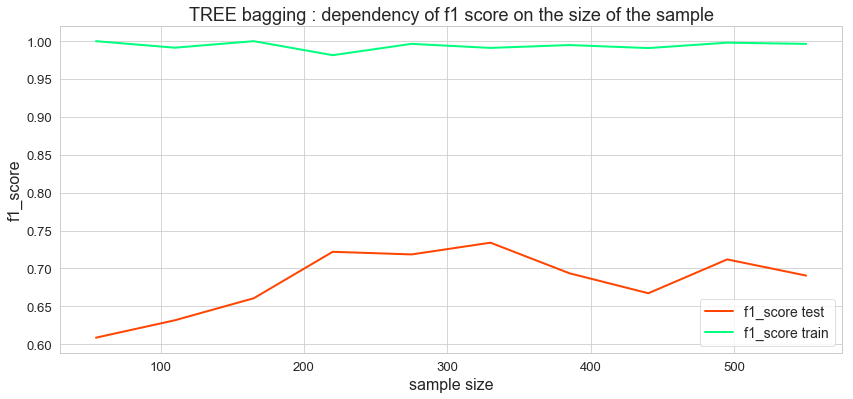

In [190]:
accuracy_graph(3)
f1_graph(3)

RandomForest:

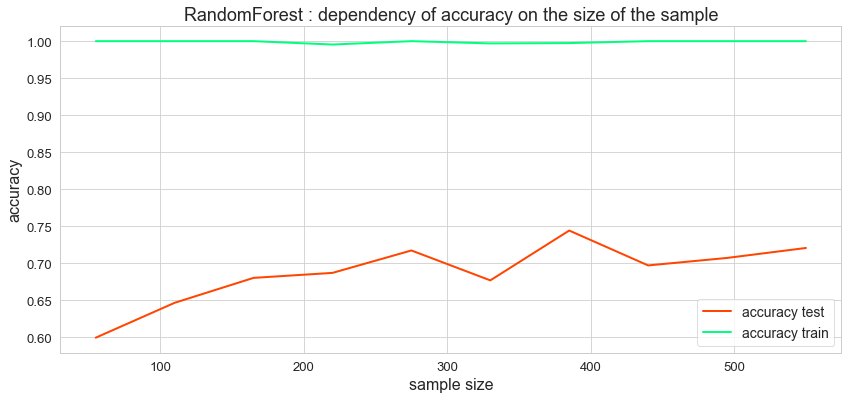

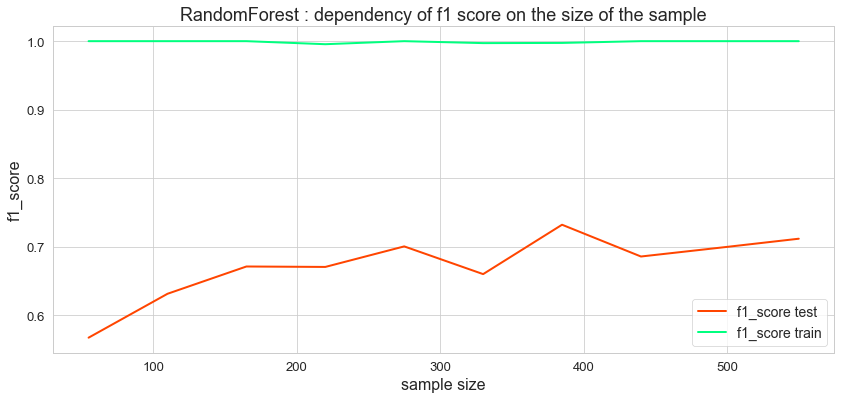

In [191]:
accuracy_graph(4)
f1_graph(4)

**Анализ графиков**

Можно заметить, что с ростом обучающей выборки, увеличиваются и accuracy, и f1 score на тестовой выборке (практически всегда). На train же чуть ближе к концу в большинстве случаев значение чуть ухудшается.

Как и в предыдущих случаях, на train результаты почти всегда получаются лучше, чем на тестовой выборке.

Выводы:
* при увеличении размера обучающей выборки, accuracy и f1 score на тестовой выборке увеличиваются (практически всегда)
* на обучающей (train) выборке кроме случаев LR, LR bagging результаты очень близки к единице
* на тестовой выборке лучшие результаты (accuracy и f1 score) получаются в случае как раз LR, LR bagging

В целом, с ростом обучающей выборки увеличивается и точность на тестовой выборке во всех пяти ситуациях. Это довольно логично: чем больше объектов будет рассмотрено в процессе обучения, тем с большей точностью получится в будущем классифицировать иные объекты. Таким образом, можно сделать из всего этого предположение, что одним из способов увеличения точности является увеличение размера обучающей выборки.

Вторая часть задания про SVM ждет вас в соседнем ноутбуке `Lab1.2_SVM`.